In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ANALIZA PODATKOV O OGLASIH ZA DELO NA E-ŠTUDENTSKEM SERVISU
Uvod v programiranje, seminarska naloga, 28. 8. 2025
Ana Raspet

V nadaljevanju sledi analiza podatkov o oglasih za delo, ki so trenutno na voljo na e-Študentskem servisu. Podatki so bili pridobljeni s spletne strani e-Študentski servis, ki je dostopna na: https://www.studentski-servis.com.

PODATKI:
Podatki, uporabljeni v tem poročilu, so na voljo vsem uporabnicam in uporabnikom spletne strani e-Študentski servis, brez potrebne registracije ali prijave na samem portalu. Podatke sem s pomočjo orodij in knjižnic, ki so na voljo v programskem jeziku Python, uspešno izluščila iz HTML-kode spletne strani e-Študentski servis. Po uspešni pridobitvi sem podatke dodatno uredila in jih shranila tako v .json kot tudi v .csv datoteko, ki sta pripravljeni za nadaljnjo obdelavo in analizo. Podatki, ki jih lahko najdemo v datotekah podatki_dela.json in podatki_dela.csv, so naslednji:

VRSTA DELA:
Podatek o tem, za kakšno vrsto dela gre. Ta podatek ima omejeno število kategorij. Posamezna kategorija se pojavi pri več različnih oglasih in omogoča grupiranje oglasov po posamezni kategoriji.

NASLOV OGLASA:
Nekoliko bolj podrobna opredelitev dela pri posameznem oglasu. Možnosti je precej več kot pri vrsti dela. Tukaj predvidevam, da naročnik ni omejen z vnaprej določenim naborom možnosti, ampak je lahko naslov oglasa poljuben.

KRAJ:
Določa, v katerem kraju oz. regiji se bo delo iz oglasa izvajalo.

PLAČILO:
Določa višino neto plačila. Ohranila sem le neto vrednost, saj se mi zdi ta podatek za študentke in študente bolj zanimiv – pove namreč točen znesek, ki ga bo študentka prejela na svoj račun za eno uro opravljenega dela.

PROSTA MESTA:
Določa, koliko prostih delovnih mest je na voljo v posameznem oglasu.

TRAJANJE:
Določa, kako dolgo bo trajalo delo iz posameznega oglasa. Tako kot pri vrsti dela gre tudi tukaj za omejen nabor možnosti, ki jih naročnik lahko izbere.

DELOVNIK:
Določa, kakšen delovnik oglas zahteva – dopoldan, popoldan itd. Tudi tukaj je nabor možnosti omejen.

ZAČETEK DELA:
Določa datum začetka dela pri posameznem oglasu.

V nadaljevanju sem poizkušala podatke analizirati na čim bolj zanimiv in izviren način. Rezultate sem nato prikazala s pomočjo različnih tabel in vizualizacij, tako da so ugotovitve hitro in jasno razvidne.

1: POVPREČNO PLAČILO
Prvo, kar me je pri analizi podatkov zanimalo, je bilo seveda to, kje in kako lahko kot študentka največ zaslužim.
Odločila sem se preveriti, katera vrsta dela je najbolje plačana in v kateri regiji je takih del največ.
Poleg tega me je zanimalo tudi, v kateri regiji oziroma kraju je povprečno plačilo najvišje ter ali bi se za boljši zaslužek morda morala preseliti na drugo stran države. Da bi dobila občutek o razporeditvi plačil pri študentskih delih, sem za začetek s pomočjo boxplota prikazala, kakšna je distribucija plač na e-Študentskem servisu. Moje ugotovitve so bile naslednje: Distribucija plačil temelji na podatkih iz 1.980 oglasov. Povprečno plačilo je znašalo 8,20 €, medtem ko je bila mediana nekoliko nižja – 7,74 €, kar kaže na prisotnost višjih vrednosti, ki povprečje dvigujejo. Najnižje evidentirano plačilo je bilo 6,32 €, najvišje pa kar 58,11 €. Na grafu se to kaže kot številni odstopajoči (outlier) primeri. Standardni odklon v višini 2,41 € dodatno potrjuje zmerno razpršenost plačil, pri čemer večina vrednosti ostaja zgoščena okoli spodnje meje razpona.

OSNOVNE UGOTOVITVE:
Število oglasov: 1980
Povprečno plačilo: 8.20€
Mediana plačila: 7.74€
Minimalno plačilo: 6.32€
Maksimalno plačilo: 58.11€
Standardni odklon: 2.41€


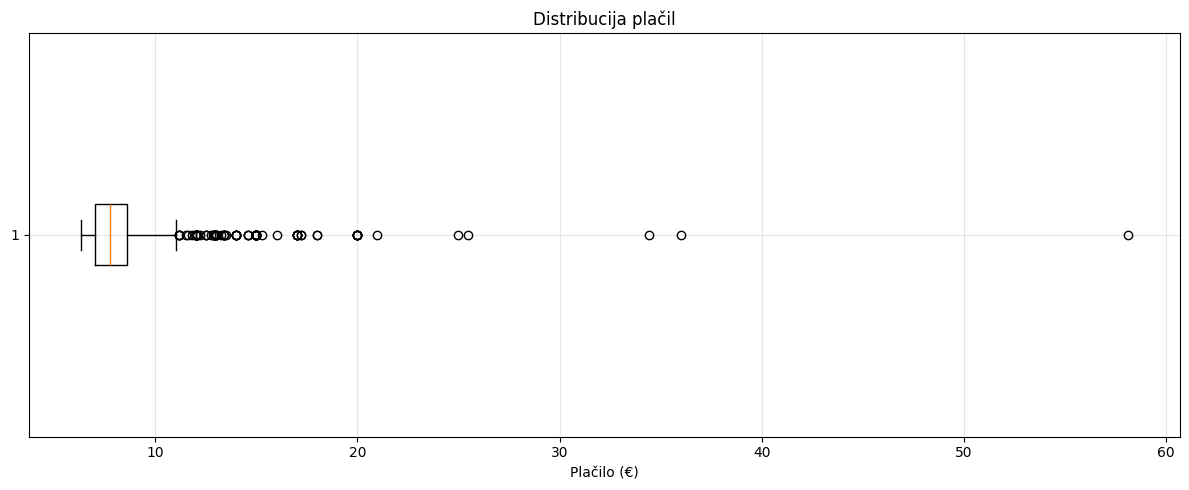

In [52]:
df = pd.read_csv('podatki_dela.csv')
df = df[df["Placilo"] != "Brez podatka"]

print("OSNOVNE UGOTOVITVE:")
print(f"Število oglasov: {len(df)}")
print(f"Povprečno plačilo: {df['Placilo'].mean():.2f}€")
print(f"Mediana plačila: {df['Placilo'].median():.2f}€")
print(f"Minimalno plačilo: {df['Placilo'].min():.2f}€")
print(f"Maksimalno plačilo: {df['Placilo'].max():.2f}€")
print(f"Standardni odklon: {df['Placilo'].std():.2f}€")


plt.figure(figsize=(12, 5))
plt.boxplot(df['Placilo'], vert=False)
plt.xlabel('Plačilo (€)')
plt.title('Distribucija plačil')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Nato sem na spodnji vizualizaciji predstavila posamezne vrste dela, razvrščene glede na višino plačila. To sem storila tako, da sem podatke iz svoje .csv datoteke najprej grupirala glede na vrsto dela, nato pa za vsako skupino posebej izračunala povprečno višino plačila.Rezultati so prikazani na dveh ločenih grafih spodaj. Zaradi velikega števila različnih vrst del sem se odločila, da prikažem le 10 najbolje plačanih del in 10 najslabše plačanih del. Kot lahko vidimo iz podatkov, lahko precej dobro zaslužimo z deli, kot so statistka, trenerka, vodja, maskota in podobno. Definitivno pa se nam kot študentkam ne splača opravljati del, kot je nakladanje in razkladanje različnih predmetov, saj so ta dela med najslabše plačanimi.

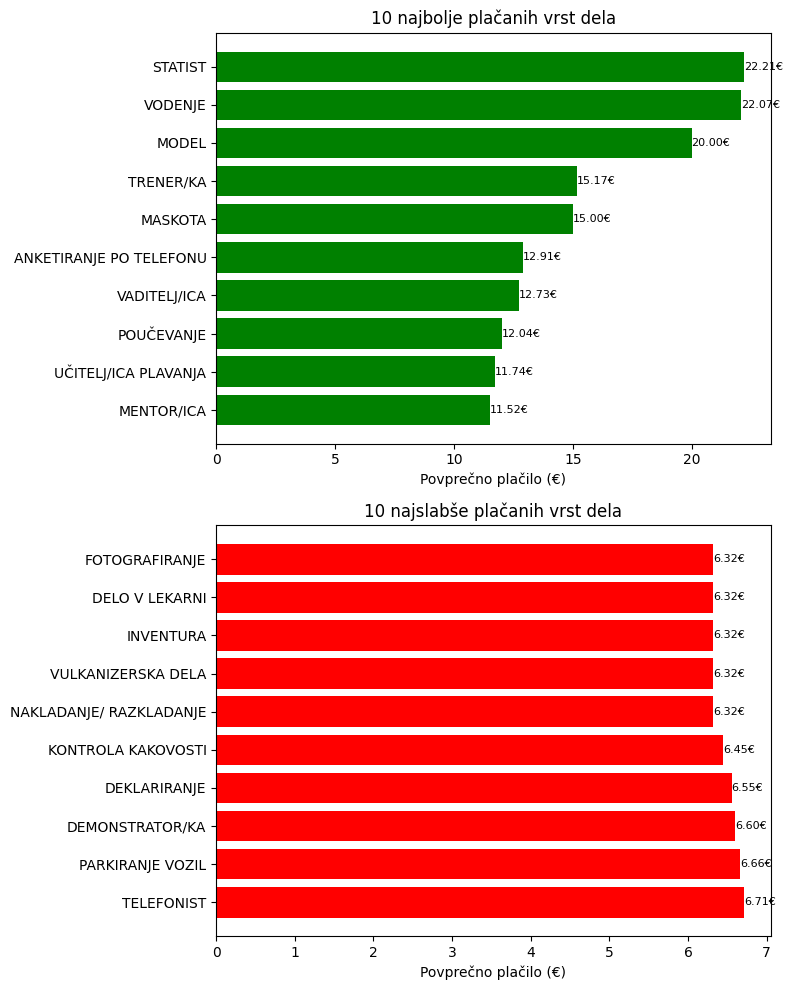

In [ ]:

df = pd.read_csv('podatki_dela.csv')

df['Placilo'] = pd.to_numeric(df['Placilo'])

# Grupiranje podatkov po Vrsta dela in izračun povprečne vrednosti plačila
povprecna_placila = df.groupby('Vrsta dela')['Placilo'].mean()

# Branje podatkov iz CSV datoteke
df = pd.read_csv('podatki_dela.csv')

df['Placilo'] = pd.to_numeric(df['Placilo'])

# Grupiranje podatkov po Vrsta dela in izračun povprečne vrednosti plačila
povprecna_placila = df.groupby('Vrsta dela')['Placilo'].mean()

# Sortiranje od največjega do najmanjšega plačila
najboljsi_10 = povprecna_placila.sort_values(ascending=False).head(10).sort_values(ascending=True)
najslabsih_10 = povprecna_placila.sort_values(ascending=True).head(10).sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# 10 najbolje plačanih
ax1.barh(range(len(najboljsi_10)), najboljsi_10.values, color='green')
ax1.set_yticks(range(len(najboljsi_10)))
ax1.set_yticklabels(najboljsi_10.index)
ax1.set_xlabel('Povprečno plačilo (€)')
ax1.set_title('10 najbolje plačanih vrst dela')

for i, value in enumerate(top_10.values):
    ax1.text(value, i, f'{value:.2f}€', va='center', fontsize=8)

# 10 najslabše plačanih
ax2.barh(range(len(najslabsih_10)), najslabsih_10.values, color='red')
ax2.set_yticks(range(len(najslabsih_10)))
ax2.set_yticklabels(najslabsih_10.index)
ax2.set_xlabel('Povprečno plačilo (€)')
ax2.set_title('10 najslabše plačanih vrst dela')

for i, value in enumerate(najslabsih_10.values):
    ax2.text(value, i, f'{value:.2f}€', va='center', fontsize=8)

plt.tight_layout()
plt.show()

Pri naslednji analizi sem se odločila raziskati, v katere kraje v Sloveniji bi se bilo smiselno preseliti, če želimo preko e-Študentskega servisa zaslužiti čim več. Ker ima veliko krajev v Sloveniji manj kot 10 aktivnih oglasov, sem se zaradi verjetno precejšnje konkurence za delo v teh krajih odločila, da se bom osredotočila le na kraje, kjer je objavljenih 10 ali več oglasov. Predvidevam namreč, da je tam verjetnost, da kot študentka dobim delo, nekoliko večja. Seznam teh krajev in povprečno plačilo v posameznem kraju je prikazan na spodnji vizualizaciji. Na podlagi ugotovljenega sem se odločila, da se zaradi dela ne bom preselila iz Ljubljane, bom pa si morda omislila letno avtobusno vozovnico do Medvod in delo iskala izven centra mesta. Če pa bi si že zaželela spremembe okolja, se zagotovo ne bi odpravila v smeri Trbovelj.

In [35]:
df = pd.read_csv('podatki_dela.csv')
st_krajev = df.groupby('Kraj').size()
kraj_statistika = df.groupby('Kraj').agg({'Placilo': 'mean', 'Kraj': 'count'}).rename(columns={'Kraj': 'ŠT. OGLASOV', 'Placilo': 'PLACILO'}).rename_axis('KRAJ')
kraj_statistika = kraj_statistika.reset_index()
filtrirani_kraji = kraj_statistika[kraj_statistika['ŠT. OGLASOV'] >= 10].sort_values('PLACILO', ascending=False)
pd.set_option('display.max_rows', None)
print(f"Kraji z več kot 10-timi oglasi")
print(f"Število krajev ki imajo več oglasov kot 10: {len(filtrirani_kraji)}")
print("\n")
print(filtrirani_kraji.round({'PLACILO': 2}).to_string(index=False))

Kraji z več kot 10-timi oglasi
Število krajev ki imajo več oglasov kot 10: 31


         KRAJ  PLACILO  ŠT. OGLASOV
      MEDVODE    12.01           10
      VELENJE    10.10           13
KRANJSKA GORA     9.32           18
       ŠENČUR     9.12           10
     PORTOROŽ     9.03           28
      KOMENDA     8.94           13
 PO SLOVENIJI     8.93           10
        KRANJ     8.66           49
       KAMNIK     8.65           27
    GROSUPLJE     8.62           17
        TRZIN     8.61           16
         BLED     8.59           17
        PIRAN     8.57           11
      VRHNIKA     8.54           11
      DOMŽALE     8.42           20
    LJUBLJANA     8.26          777
      LOGATEC     7.99           14
     JESENICE     7.98           13
  ŠKOFJA LOKA     7.92           15
        KOPER     7.91           72
         PTUJ     7.84           18
       SEŽANA     7.82           14
      MARIBOR     7.71          113
        CELJE     7.62           42
     POSTOJNA     7.

2. NAJBOLJ ISKANA DELA

Pri tej analizi sem se osredotočila na iskanje najbolj zaželenih del. Zanimalo me je, kakšen kader je trenutno na trgu najbolj iskan, ter kje v Sloveniji je povpraševanje po takšnem kadru največje – torej, v katerih krajih je za določeno iskano delo na voljo največ prostih delovnih mest.

Na spodnji vizualizaciji sem, podobno kot pri analizi plačil, prikazala 10 najbolj in 10 najmanj iskanih kadrov na trgu. Deset najmanj iskanih del sem zgolj izpisala, saj imajo vsa le en oglas in eno prosto mesto, zato se mi prikaz v grafični obliki ni zdel smiseln. Če sem prej želela ugotoviti, s katerim delom bi kot študentka lahko največ zaslužila, me je tukaj bolj zanimalo, kaj je dobro znati in kje iskati delo, da bom lahko delo čim lažje in hitreje našla – ne glede na višino plačila. Podatke sem najprej grupirala po vrsti dela in izračunala skupno število prostih delovnih mest za vsako vrsto. Nato sem podatke sortirala glede na število prostih mest in prikazala 10 najbolj ter 10 najmanj iskanih del. V nadaljevanju sem podobno analizo izvedla še za kraje, kjer so ta delovna mesta na voljo. Osnovno tabelo z oglasi sem najprej filtrirala tako, da sem ohranila le tiste oglase, kjer je vrsta dela ena izmed 10 najbolj iskanih iz prejšnje analize. Dobljeno, filtrirano tabelo sem nato grupirala po krajih in preštela vsa dela v posameznem kraju. Rezultate sem urejala po številu delovnih mest in prikazala 10 krajev, ki ponujajo največ del za najbolj iskana dela. Na ta način sem dobila seznam 10 krajev, kjer je možnost zaposlitve zelo visoka, saj je v teh krajih na voljo veliko del z visoko ponudbo prostih mest.

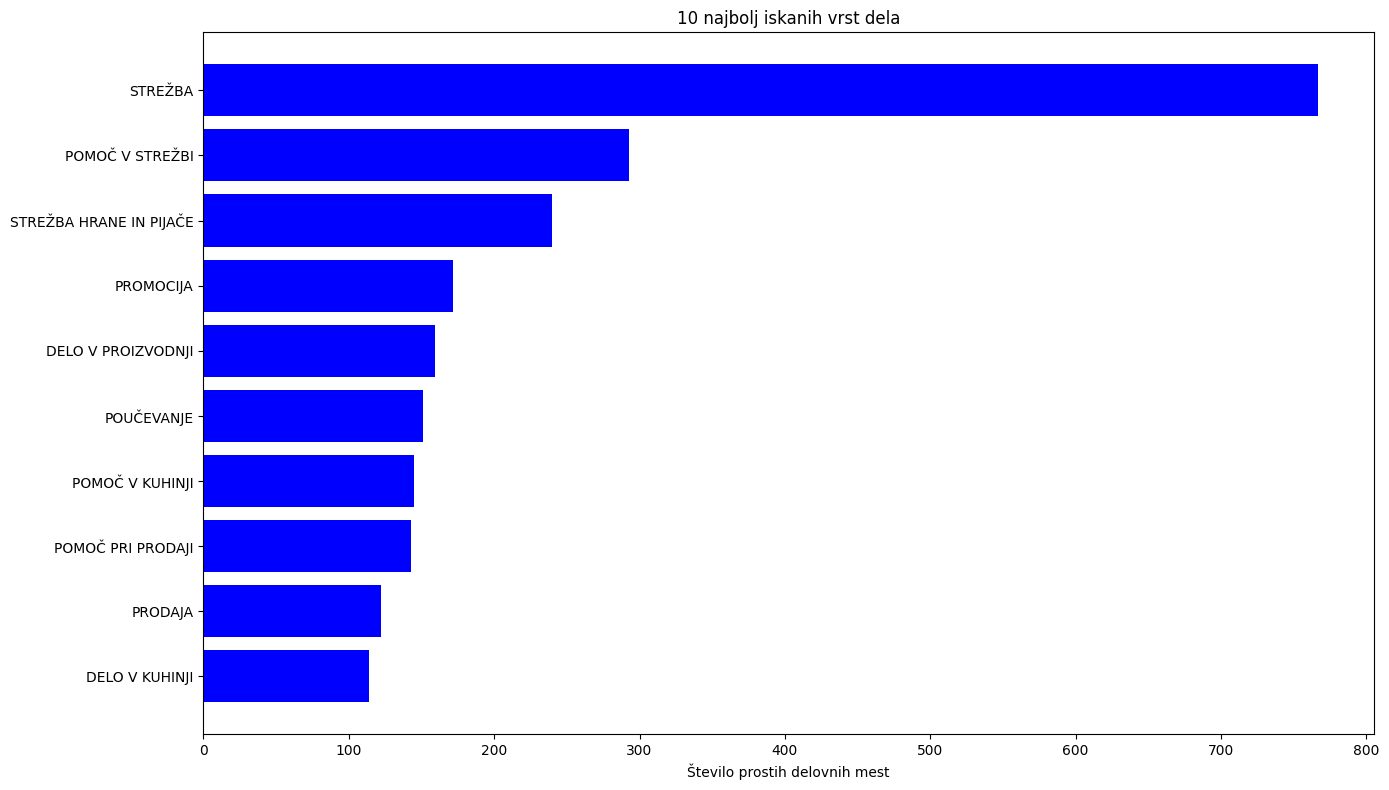

NAJMANJ ISKANA DELA: 

NAKLADANJE/ RAZKLADANJE
FOTOGRAFIRANJE
KONTROLA KAKOVOSTI
TAJNIŠKA DELA
VNOS PODATKOV V RAČUNALNIK
DELO V LOTERIJI
DELO V FARMACIJI
POMOČ V SKLADIŠČU IN PROD. CENTRIH
VULKANIZERSKA DELA
PREDAVANJE


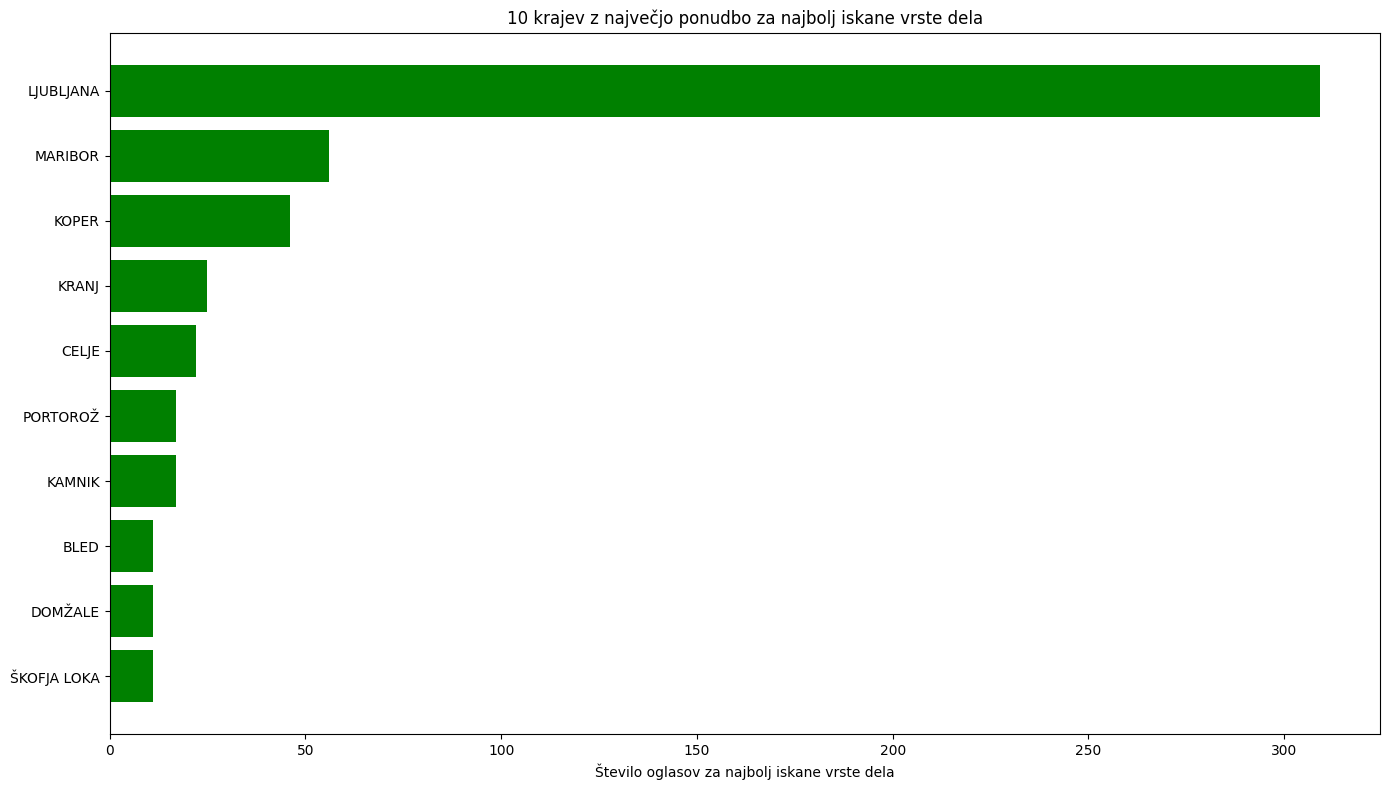

In [36]:

df = pd.read_csv('podatki_dela.csv')
df['Prosta mesta'] = pd.to_numeric(df['Prosta mesta'], errors='coerce')


vsota_mest = df.groupby('Vrsta dela')['Prosta mesta'].sum()
stevilo_oglasov = df.groupby('Vrsta dela').size()
statistika = pd.DataFrame({
    'št_oglasov': stevilo_oglasov,
    'vsota_prostih_mest': vsota_mest
})

statistika_preciscena = statistika[statistika['vsota_prostih_mest'] > 0]

# Prvih in zadnjih 10 po vsoti prostih mest
najboljsih_10 = statistika_preciscena.sort_values('vsota_prostih_mest', ascending=False).head(10)
najboljsih_10 = najboljsih_10.sort_values(by='vsota_prostih_mest', ascending=True)
najslabsih_10 = statistika_preciscena.sort_values('vsota_prostih_mest', ascending=True).head(10)
najslabsih_10 = najslabsih_10.sort_values(by='vsota_prostih_mest', ascending=False)

# 7. Filtriramo originalno tabelo na top 10 vrst dela in izračunamo kraje
top_10_vrste = najboljsih_10.index
filtrirana_tabela = df[df['Vrsta dela'].isin(top_10_vrste)]
kraji_ponudba = filtrirana_tabela.groupby('Kraj').size().sort_values(ascending=False).head(10).sort_values(ascending=True)

# 8. 10 najbolj iskanih vrst dela
plt.figure(figsize=(14, 8))
plt.barh(range(len(najboljsih_10)), najboljsih_10['vsota_prostih_mest'].values, color='blue')
plt.yticks(range(len(najboljsih_10)), najboljsih_10.index)
plt.xlabel('Število prostih delovnih mest')
plt.title('10 najbolj iskanih vrst dela')
plt.tight_layout()
plt.show()

# 10 najmanj iskanih vrst dela
najslabsih_10 = najslabsih_10.reset_index()
print("NAJMANJ ISKANA DELA: \n")
for vrsta in najslabsih_10['Vrsta dela']:
    print(f"{vrsta}")

# 10 krajev z največ ponudbo za najbolj iskane vrste dela
plt.figure(figsize=(14, 8))
plt.barh(range(len(kraji_ponudba)), kraji_ponudba.values, color='green')
plt.yticks(range(len(kraji_ponudba)), kraji_ponudba.index)
plt.xlabel('Število oglasov za najbolj iskane vrste dela')
plt.title('10 krajev z največjo ponudbo za najbolj iskane vrste dela')
plt.tight_layout()
plt.show()

3. DELOVNIK

Sama najraje delam dopoldne, ko imam največ energije, preostanek dneva pa namenim hobijem in drugim bolj sproščujočim dejavnostim. Zavedam se, da so delovniki različni in da to ni vedno mogoče.Med študentskimi deli je kar nekaj takih, ki vključujejo popoldansko delo, izmenski delovni čas ali pa omogočajo dogovarjanje glede delovnika. Zato sem želela preveriti, kako je število oglasov razporejeno glede na različne oblike delovnika. Predvidevala sem, da bo daleč največ del takih, ki imajo dopoldanski delovni čas, najmanj pa tistih, kjer se je mogoče glede delovnika dogovoriti. Izkazalo se je, da sem se v svojih predvidevanjih nekoliko zmotila. Slovenski delodajalci so, kot kaže, kar zadeva delovni čas precej fleksibilni, saj je največji delež del takih, kjer se je mogoče o delovniku dogovoriti. Druga najpogostejša oblika je izmensko delo, klasično dopoldansko delo pa je šele na tretjem mestu. Res pa je, da so si delovniki na prvih treh mestih precej blizu po številu oglasov, nato pa število hitro upade. Na zadnjem mestu so, kar je bilo pričakovano dela, ki se izvajajo izključno med vikendi. Podrobne podatke o številu del v posamezni kategoriji lahko vidite v spodnjem izpisu in v predstavitvi s pomočjo tortnega diagrama.

PO DOGOVORU: 618
IZMENSKO: 593
DOPOLDAN: 521
POPOLDAN: 187
MED VIKENDI: 61


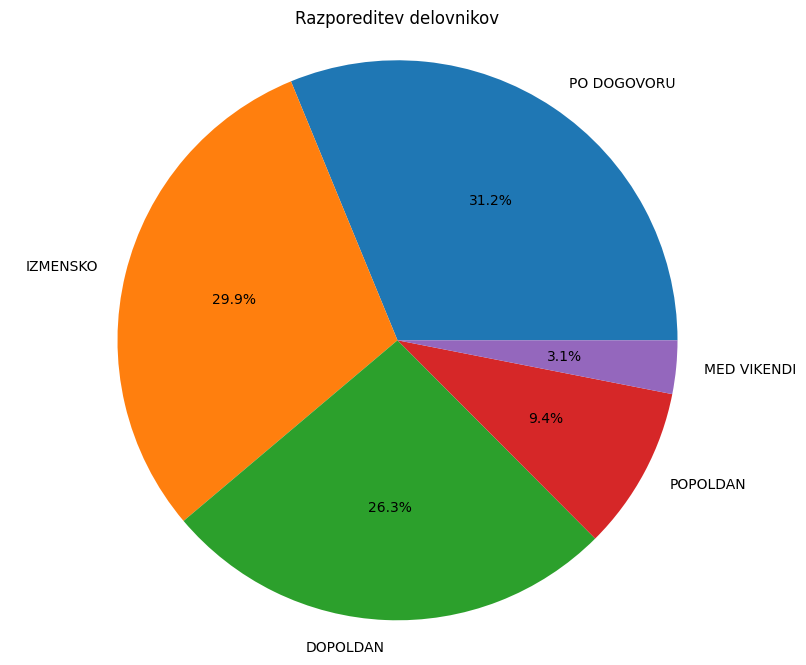

In [37]:
#podatke razdelimo v skupine po delovnikih in preštejemo koliko oglasov je v posamezni skupini
df = pd.read_csv('podatki_dela.csv')
df = df[df['Delovnik'] != 'Brez podatka']
delovniki = df.groupby('Delovnik').size()
delovniki = delovniki.sort_values(ascending=False)
for delovnik in delovniki.index:
    print(f"{delovnik}: {delovniki[delovnik]}")
    
plt.figure(figsize=(10, 8))
plt.pie(delovniki.values, labels=delovniki.index, autopct='%1.1f%%')
plt.title('Razporeditev delovnikov')
plt.axis('equal')
plt.show()


Zdaj, ko sem si ustvarila boljšo predstavo o tem, kako so dela porazdeljena glede na njihov delovnik, me je zanimalo še, kakšno je povprečno plačilo glede na posamezen delovnik. Moja hipoteza je bila, da bo plačilo naraščalo obratno sorazmerno s številom razpoložljivih delovnih mest. Kot kaže, sem se tudi tukaj v svojih predikcijah nekoliko zmotila. Pričakovala sem, da bodo dela med vikendi v povprečju najbolje plačana, vendar sem ugotovila, da so šele na tretjem mestu. Najbolje plačana so namreč dela, kjer se dela popoldne, sledijo pa jim tista, pri katerih se je mogoče o delovniku dogovoriti.
Pravilno pa sem predvidevala, da so nekoliko slabše plačana dela, ki potekajo dopoldne ali izmensko. Vsi rezultati so prikazani spodaj – v obliki izpisa s konkretnimi vrednostmi in tudi s pomočjo Lollipop charta.

POPOLDAN: 9.85€
PO DOGOVORU: 8.37€
MED VIKENDI: 8.22€
DOPOLDAN: 7.91€
IZMENSKO: 7.76€


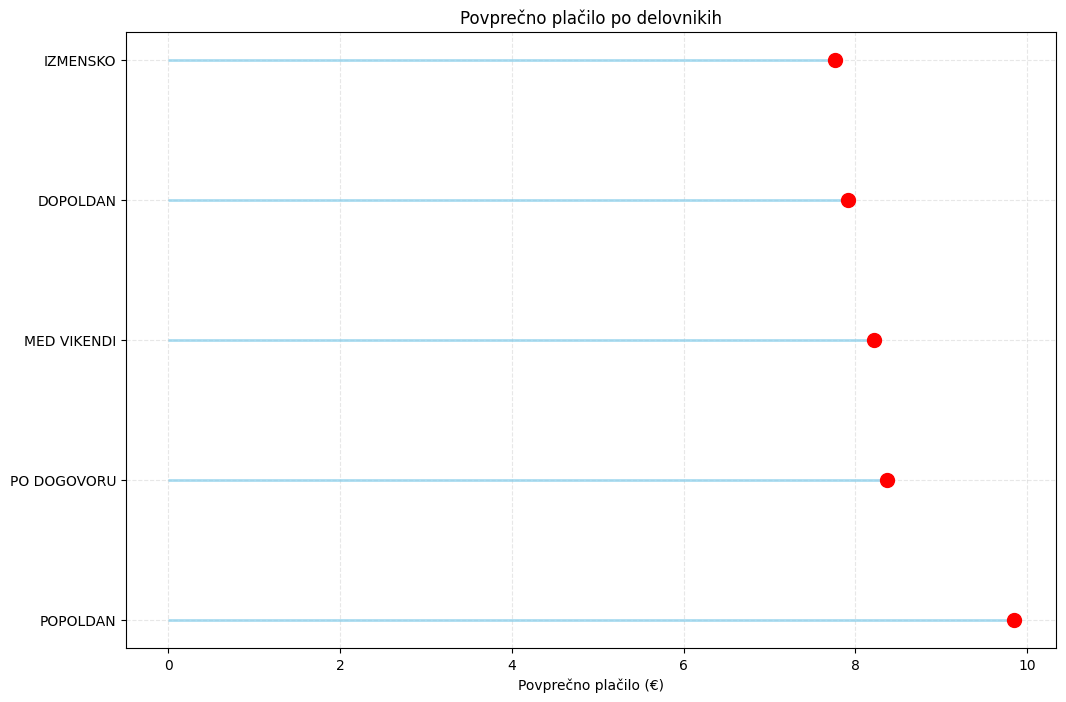

In [38]:
#podatke razdelimo v skupine po delovnikih in izračunamo povprečno plačilo v posamezni skupini
df = pd.read_csv('podatki_dela.csv')
df = df[df['Delovnik'] != 'Brez podatka']
df = df.groupby('Delovnik')['Placilo'].mean()
df = df.sort_values(ascending=False)
for delovnik in df.index:
    print(f"{delovnik}: {df[delovnik]:.2f}€")

plt.figure(figsize=(12, 8))
plt.hlines(y=df.index, xmin=0, xmax=df.values, 
           color='skyblue', alpha=0.7, linewidth=2)
plt.plot(df.values, df.index, "o", markersize=10, color='red')
plt.xlabel('Povprečno plačilo (€)')
plt.title('Povprečno plačilo po delovnikih')
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()

4. LAŽJE JE DELATI V DOBRI DRUŽBI

Ker sem večkrat delala s prijateljicami, me je zanimalo, na koliko delovnih mest v Ljubljani (kjer živim) se lahko prijavim skupaj s prijateljico.
Ker bi med delom z veseljem klepetala s prijateljico, so me moje ugotovitve precej razveselile. V Ljubljani je namreč kar nekaj del, ki bi jih lahko opravljala skupaj s prijateljico – in ob tem tudi veselo klepetala (če seveda v lokalu ne bi bilo preveč gostov – glej rezultate spodaj). Večina teh del je povezana s strežbo oziroma z različnimi oblikami dela v lokalih in restavracijah. Nekaj del se pojavi tudi na področju prodaje ter v trgovinah in skladiščih. Sveti gral tega nabora pa je, seveda PROGRAMIRANJE. Delo v klimatizirani pisarni – z matcha lattejem v roki in fancy dvižno mizo pred seboj, pa še plačilo je najboljše – kar bi si lahko privoščila, če opravim predmet, na katerega se nanaša ta seminarska naloga: Uvod v programiranje. Edini problem bi bil morda ta, da tam ne bi imela ravno veliko časa za klepetanje.

In [45]:
df = pd.read_csv('podatki_dela.csv')
df = df[df['Kraj'] == 'LJUBLJANA']
df = df[df['Prosta mesta'] == 2]
stevilo_oglasov_po_vrsti_dela = df.groupby('Vrsta dela').size()
dela_z_najvec_ponudbe = stevilo_oglasov_po_vrsti_dela.sort_values(ascending=False).head(10)

povprecna_placa_po_vrsti = df.groupby('Vrsta dela')['Placilo'].mean()
povprecna_placa_po_vrsti = povprecna_placa_po_vrsti.reindex(dela_z_najvec_ponudbe.index)

for vrsta in dela_z_najvec_ponudbe.index:
    stevilo = dela_z_najvec_ponudbe[vrsta]
    placa = povprecna_placa_po_vrsti[vrsta]
    print(f"{vrsta}: {stevilo} oglasov, povprečno plačilo: {placa:.2f}€")

STREŽBA: 28 oglasov, povprečno plačilo: 8.12€
STREŽBA HRANE IN PIJAČE: 17 oglasov, povprečno plačilo: 8.49€
POMOČ V STREŽBI: 12 oglasov, povprečno plačilo: 8.17€
POMOČ PRI PRODAJI: 10 oglasov, povprečno plačilo: 6.39€
PRODAJA: 8 oglasov, povprečno plačilo: 6.86€
POMOČ V KUHINJI: 6 oglasov, povprečno plačilo: 7.49€
ZDRAVSTVENA NEGA: 5 oglasov, povprečno plačilo: 7.25€
DELO V SKLADIŠČU: 5 oglasov, povprečno plačilo: 7.22€
PROGRAMIRANJE: 5 oglasov, povprečno plačilo: 10.16€
POMOČ V TRGOVINI: 4 oglasov, povprečno plačilo: 7.37€


5. NAPOVEDOVANJE VIŠINE PLAČILA

V tem delu poročila sem želela preveriti še, ali lahko na podlagi števila prostih delovnih mest ali dolžine trajanja dela napovemo višino plačila.
Za merjenje povezanosti med spremenljivkami sem uporabila Pearsonov korelacijski koeficient, rezultate pa sem prikazala s scatter plotom in regresijsko premico. Analiza povezave med številom prostih mest in višino plačila je pokazala izjemno šibko negativno korelacijo (Pearsonov koeficient: –0,015), kar pomeni, da praktično ni linearne povezave med tema dvema spremenljivkama. Regresijska premica je skoraj vodoravna, kar dodatno potrjuje, da število prostih mest nima opaznega vpliva na ponujeno plačilo. Plačila so precej razpršena, ne glede na to, ali gre za eno ali več prostih mest, zato ta dejavnik ni uporaben napovedovalec višine plačila. Na moje presenečenje pa se je izkazalo, da obstaja šibka pozitivna korelacija med datumom začetka dela (izraženim kot dnevi v letu) in višino plačila. Pearsonov koeficient znaša 0,223, kar pomeni, da se s poznejšim datumom začetka dela povprečno plačilo rahlo povečuje. Regresijska premica ima pozitiven naklon, kar potrjuje ta trend, a zaradi nizke vrednosti korelacijskega koeficienta sklepam, da je vpliv datuma začetka dela na plačilo prisoten, vendar razmeroma majhen.

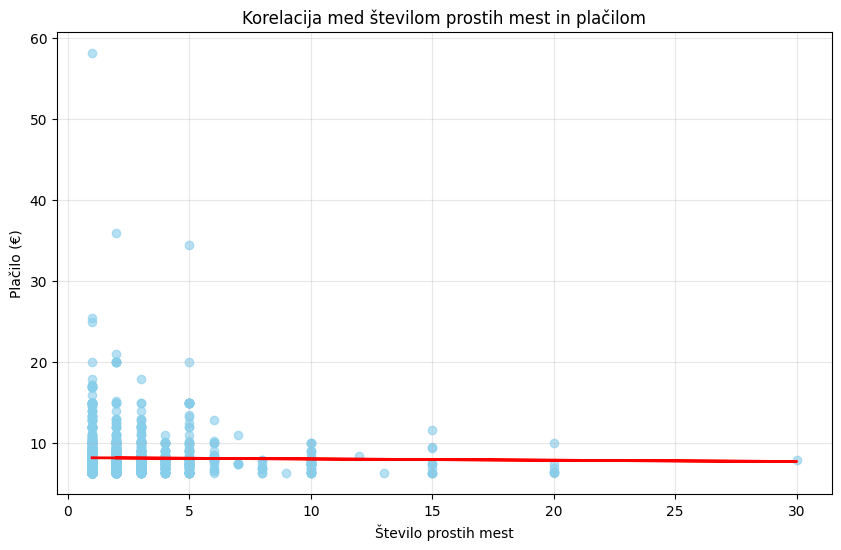

Pearsonov korelacijski koeficient: -0.015
Moč korelacije: 0.015


In [61]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('podatki_dela.csv')
df = df[df["Placilo"] != "Brez podatka"]
df = df[df["Prosta mesta"] != "Brez podatka"]

X = df['Prosta mesta'].values
y = df['Placilo'].values

pearson = np.corrcoef(X, y)[0, 1]
coefficients = np.polyfit(X, y, 1)
poly = np.poly1d(coefficients)
y_pred = poly(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='skyblue', label='Podatki')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Število prostih mest')
plt.ylabel('Plačilo (€)')
plt.title(f'Korelacija med številom prostih mest in plačilom')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Pearsonov korelacijski koeficient: {pearson:.3f}")
print(f"Moč korelacije: {abs(pearson):.3f}")

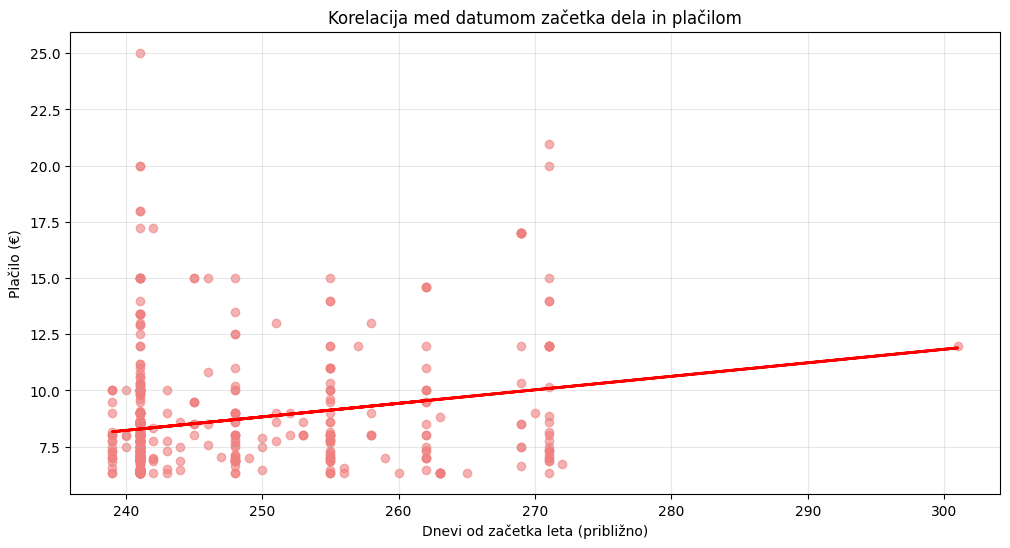

Pearsonov korelacijski koeficient: 0.223
Moč korelacije: 0.223


In [66]:
df = pd.read_csv('podatki_dela.csv')
df = df[df["Placilo"] != "Brez podatka"]
df = df[df["Začetek dela"] != "Brez podatka"]

# Pretvorba datumov v število dni od 1.1.2025 - to je le približna pretvorba
dnevi_lista = []
for datum in df['Začetek dela']:
    if datum != "Brez podatka":
        parts = datum.replace(' ', '').split('.')
        if len(parts) >= 3:
            dan = int(parts[0])
            mesec = int(parts[1])
            leto = int(parts[2])
            # Preprost izračun dni (približno)
            dnevi = (mesec - 1) * 30 + dan
            dnevi_lista.append(dnevi)
        else:
            dnevi_lista.append(None)
    else:
        dnevi_lista.append(None)

df['Dnevi_od_zacetka_leta'] = dnevi_lista
df = df.dropna(subset=['Dnevi_od_zacetka_leta'])

X = df['Dnevi_od_zacetka_leta'].values
y = df['Placilo'].values

# Pearsonov korelacijski koeficient
pearson = np.corrcoef(X, y)[0, 1]

# Regresijska premica
coefficients = np.polyfit(X, y, 1)
poly = np.poly1d(coefficients)
y_pred = poly(X)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.6, color='lightcoral', label='Podatki')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Dnevi od začetka leta (približno)')
plt.ylabel('Plačilo (€)')
plt.title(f'Korelacija med datumom začetka dela in plačilom')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Pearsonov korelacijski koeficient: {pearson:.3f}")
print(f"Moč korelacije: {abs(pearson):.3f}")